In [35]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from xgboost import plot_importance, XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from time import time
import seaborn as sns

from tensorflow.keras.layers import (Dense, Activation, Input, Conv2D, MaxPooling2D, Flatten,
                                     GlobalMaxPooling2D, LeakyReLU, concatenate, Dropout)
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [36]:
X = np.load('../project1/X.npy')
Y = np.load('../project1/Y.npy')

In [51]:
Ydf = DataFrame(data=Y, columns=[9-x for x in range(10)])
Ydf = Ydf[[x for x in range(10)]].to_numpy()
#Ydf = Y
#Ydf['class']='C' + (Ydf[range(10)].idxmax(axis=1)).astype('str')
#Ydf[['class']]
#Y2 = Ydf[['class']].to_numpy()

In [52]:
Ydf

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [38]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [39]:
X.shape

(2062, 64, 64, 1)

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Ydf, test_size=0.3, random_state=42)

In [41]:
def create_model(input_shape=(64,64,1)):
    return Sequential([
        Input(shape=input_shape),
        
        Conv2D(8,(3,3), padding='same', input_shape=input_shape),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(16,(3,3), padding='same'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(4,(3,3), padding='same'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Flatten(),
        
        Dense(64),
        Activation('relu'),
        Dense(32),
        Activation('relu'),
        Dense(10),
        Activation('softmax')
])

In [42]:
loss='categorical_crossentropy'
LEARNING_RATE = 0.05
BATCH_SIZE = X_train.shape[0]//20 # computing the loss over the whole dataset
EPOCHS = 200
model = create_model()
model.compile(loss=loss, optimizer='adamax')# metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 8)         80        
_________________________________________________________________
activation_21 (Activation)   (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 16)        1168      
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 4)        

In [43]:
t0 = time()
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
print (time()-t0)

Train on 1443 samples, validate on 619 samples
Epoch 1/200
1443/1443 [==============================] - 2s 1ms/sample - loss: 2.2985 - val_loss: 2.2899
Epoch 2/200
1443/1443 [==============================] - 1s 701us/sample - loss: 2.2848 - val_loss: 2.2784
Epoch 3/200
1443/1443 [==============================] - 1s 711us/sample - loss: 2.2685 - val_loss: 2.2609
Epoch 4/200
1443/1443 [==============================] - 1s 705us/sample - loss: 2.2448 - val_loss: 2.2330
Epoch 5/200
1443/1443 [==============================] - 1s 690us/sample - loss: 2.2087 - val_loss: 2.1853
Epoch 6/200
1443/1443 [==============================] - 1s 701us/sample - loss: 2.1487 - val_loss: 2.1150
Epoch 7/200
1443/1443 [==============================] - 1s 694us/sample - loss: 2.0664 - val_loss: 2.0214
Epoch 8/200
1443/1443 [==============================] - 1s 693us/sample - loss: 1.9586 - val_loss: 1.9029
Epoch 9/200
1443/1443 [==============================] - 1s 690us/sample - loss: 1.8419 - val_loss:

1443/1443 [==============================] - 1s 721us/sample - loss: 0.4208 - val_loss: 0.4970
Epoch 77/200
1443/1443 [==============================] - 1s 727us/sample - loss: 0.4197 - val_loss: 0.4778
Epoch 78/200
1443/1443 [==============================] - 1s 725us/sample - loss: 0.4146 - val_loss: 0.4806
Epoch 79/200
1443/1443 [==============================] - 1s 723us/sample - loss: 0.4086 - val_loss: 0.4809
Epoch 80/200
1443/1443 [==============================] - 1s 721us/sample - loss: 0.4064 - val_loss: 0.4936
Epoch 81/200
1443/1443 [==============================] - 1s 730us/sample - loss: 0.4143 - val_loss: 0.4851
Epoch 82/200
1443/1443 [==============================] - 1s 724us/sample - loss: 0.4067 - val_loss: 0.4727
Epoch 83/200
1443/1443 [==============================] - 1s 723us/sample - loss: 0.4040 - val_loss: 0.4745
Epoch 84/200
1443/1443 [==============================] - 1s 721us/sample - loss: 0.4144 - val_loss: 0.4718
Epoch 85/200
1443/1443 [=================

1443/1443 [==============================] - 1s 792us/sample - loss: 0.2432 - val_loss: 0.4127
Epoch 152/200
1443/1443 [==============================] - 1s 733us/sample - loss: 0.2538 - val_loss: 0.4132
Epoch 153/200
1443/1443 [==============================] - 1s 753us/sample - loss: 0.2711 - val_loss: 0.4202
Epoch 154/200
1443/1443 [==============================] - 1s 799us/sample - loss: 0.2547 - val_loss: 0.4108
Epoch 155/200
1443/1443 [==============================] - 1s 782us/sample - loss: 0.2404 - val_loss: 0.4082
Epoch 156/200
1443/1443 [==============================] - 1s 810us/sample - loss: 0.2384 - val_loss: 0.4057
Epoch 157/200
1443/1443 [==============================] - 1s 806us/sample - loss: 0.2424 - val_loss: 0.4086
Epoch 158/200
1443/1443 [==============================] - 1s 861us/sample - loss: 0.2337 - val_loss: 0.4070
Epoch 159/200
1443/1443 [==============================] - 1s 737us/sample - loss: 0.2326 - val_loss: 0.4066
Epoch 160/200
1443/1443 [========

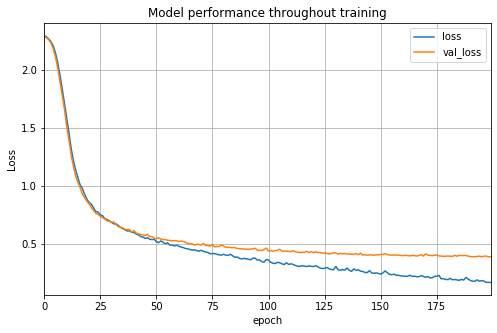

In [44]:
DataFrame(history.history).plot(figsize=(8, 5))#, logy=True)
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [45]:
y_pred = model.predict(X_train)

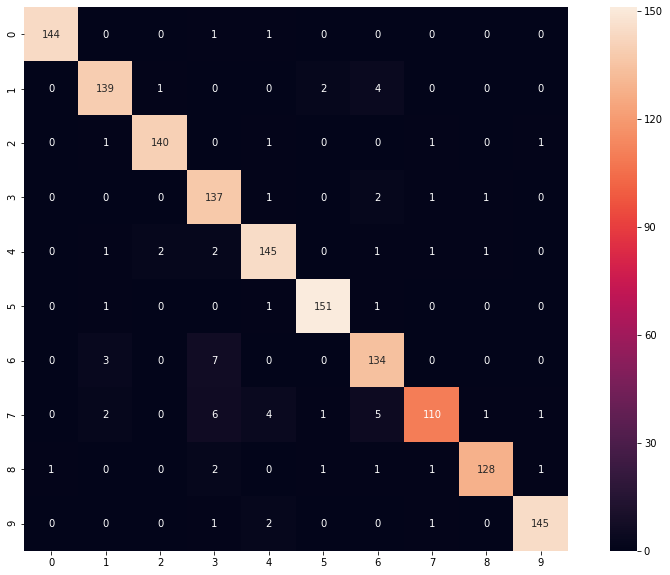

Accuracy= 0.9514899514899515


In [46]:
y_train_class = y_train.argmax(axis=1)
y_pred_class = y_pred.argmax(axis=1)
conf_mat = confusion_matrix(y_train_class, y_pred_class)
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print('Accuracy=', accuracy_score(y_train_class, y_pred_class))

In [47]:
y_pred[0]

array([4.5195770e-06, 2.2009367e-07, 2.0609338e-04, 3.9478822e-05,
       4.0018688e-07, 1.2456626e-10, 4.4948436e-08, 1.2889402e-05,
       9.9973637e-01, 1.0536216e-09], dtype=float32)